# Project: No-Show Appointments Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Medical No-show Appointment DataSet consist of over 101 thousand appointment from Brazil.The dataset is from <a href="https://www.kaggle.com/joniarroba/noshowappointments">Kaggle Dataset</a>. It was created to analysis what factors have effects on patients attending their appointments.

> The table consists of:
<a id='describtive-table'></a>
<table style='float:left;'>
  <tr>
    <th style='text-align:center'>Name</th>
    <th style='text-align:center'>Description</th>
    <th style='text-align:center'>Datatype</th>
    <th style='text-align:center'>Correct Datatype</th>
  </tr>
  <tr>
    <td style='text-align:center'>PatiendId</td>
    <td style='text-align:center'>Unique patient id</td>
    <td style='text-align:center'>float64</td>
    <td style='text-align:center'>int64</td>
  </tr>
  <tr>
    <td style='text-align:center'>AppointmentID</td>
    <td style='text-align:center'>Unique Appointment id</td>
    <td style='text-align:center'>int64</td>
    <td style='text-align:center'>int64</td>
  </tr>
  <tr>
    <td style='text-align:center'>Gender</td>
    <td style='text-align:center'>Patient Gender</td>
    <td style='text-align:center'>string</td>
    <td style='text-align:center'>string</td>
  </tr>
  <tr>
    <td style='text-align:center'>ScheduledDay</td>
    <td style='text-align:center'>The day the patient called to set the appointment</td>
    <td style='text-align:center'>string</td>
    <td style='text-align:center'>datetime64</td>
  </tr>
  <tr>
    <td style='text-align:center'>AppointmentDay</td>
    <td style='text-align:center'>The day of the appointment</td>
    <td style='text-align:center'>string</td>
    <td style='text-align:center'>datetime64</td>
  </tr>
  <tr>
    <td style='text-align:center'>Age</td>
    <td style='text-align:center'>Patient age</td>
    <td style='text-align:center'>int64</td>
    <td style='text-align:center'>int64</td>
  </tr>
  <tr>
    <td style='text-align:center'>Neibourhood</td>
    <td style='text-align:center'>The location of the appointment</td>
    <td style='text-align:center'>string</td>
    <td style='text-align:center'>string</td>
  </tr>
  <tr>
    <td style='text-align:center'>Scholarship</td>
    <td style='text-align:center'>In the wellfare programe</td>
    <td style='text-align:center'>int64</td>
    <td style='text-align:center'>bool</td>
  </tr>
  <tr>
    <td style='text-align:center'>Hipertension</td>
    <td style='text-align:center'>Does patient have hipertension</td>
    <td style='text-align:center'>int64</td>
    <td style='text-align:center'>bool</td>
  </tr>
  <tr>
    <td style='text-align:center'>Diabetes</td>
    <td style='text-align:center'>Does patient have diabetes</td>
    <td style='text-align:center'>int64</td>
    <td style='text-align:center'>bool</td>
  </tr>
  <tr>
    <td style='text-align:center'>Alcoholism</td>
    <td style='text-align:center'>Is the patient alcoholic</td>
    <td style='text-align:center'>int64</td>
    <td style='text-align:center'>bool</td>
  </tr>
  <tr>
    <td style='text-align:center'>Handcap</td>
    <td style='text-align:center'>Number of disablities that the patient have</td>
    <td style='text-align:center'>int64</td>
    <td style='text-align:center'>int64</td>
  </tr>
  <tr>
    <td style='text-align:center'>SMS_recieved</td>
    <td style='text-align:center'>Did the patient recieve an sms reminder message</td>
    <td style='text-align:center'>int64</td>
    <td style='text-align:center'>bool</td>
  </tr>
  <tr>
    <td style='text-align:center'>No-show</td>
    <td style='text-align:center'>Did the patient show up</td>
    <td style='text-align:center'>string</td>
    <td style='text-align:center'>binary</td>
  </tr>
</table>

## Research Questions:
<ul>
<li>What is the overall show up rate?</li>
<li>Is the age associate with patients attending their appointments?</li>
<li>Did the pateint who didn't recieve sms messages didn't show up for their appointments?</li>
<li>Do some days of the week has fewer attendance?</li>
<li>Does handicap, diabtes, hypertension or alcoholic patiends tend to not attend their appointments?</li>
<li> Which neighbourhood has the highest number of appointments?</li>
</ul>

The following are the packages that will be used to make the data anyalysis process easier.

In [610]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In the following command we will load the dataset into dataframe using pandas libaray then dispaly the first four rows.

In [611]:
#load our dataset
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The following commands show information about the data and the dimension of the dataset

In [612]:
#checking the dimension, numberss of samples and datatype our dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


if we looked closely we will notice that there are few datatypes that need to be converted to the correct datatype as i mentioned in the table <a href="#describtive-table">above</a>

Next we will display general statistics about our dataset

In [613]:
#general information about our dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset contains two unique ids. which are appointmentid and patientid. But its not clear if its unique for each row or it can be repeated. but if we follow the logic of the dataset then we will notice that it make sense to have a unique appointmentid but the patientid can be repeated. so lets confirm this with a pandas function called nunique.

In [614]:
#count unique values in appointmentid and patient id
df.loc[:,['AppointmentID','PatientId']].nunique()

AppointmentID    110527
PatientId         62299
dtype: int64

As we can see that the function confirms that there is unique appointmentid for each row and the patientid is reused thats why there are less patientid than the number of row. next we will check if there is any duplicated values.

In [615]:
#check if there is any duplicated data
df.duplicated().sum()

0

We will also check if there is any missing values in our dataset

In [616]:
#check for any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

just to make things easier lets start cleaning our data by renaming our columns so thats its easier to deal with them later.


### Data Cleaning 

In [617]:
#Lets set the columns names to lowercase first
df.columns = df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [618]:
#now lets rename our columns
df.rename(columns={'patientid'      : 'patient_id'      ,
                   'appointmentid'  : 'appointment_id'  ,
                   'scheduledday'   : 'scheduled_day'   ,
                   'appointmentday' : 'appointment_day' ,
                   'hipertension'   : 'hypertension'    ,
                   'handcap'        : 'handicap'        ,
                   'no-show'        : 'no_show'         } , inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Lets see if there are any patients that has incorrect age. for example, if there is any age equal to zero or have negative values. Or if there is any patients older than 105 which will be unlikely.

In [619]:
#checking if there is patients with age 0 or negative
df[df.age <= 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


So it turns out that there is patients with negative age which is incorrect. Now lets check if there is patients who are older than 105

In [620]:
#checking if there are people who are older than 105 years old
df[df.age > 105 ]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [621]:
#drop the negative and unreasonable values in age
df = df[(df.age >= 0) & (df.age < 115)]
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


C:\Users\em_la\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


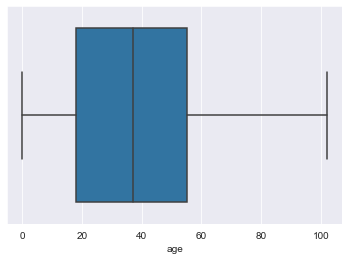

In [622]:
# lets creat boxplot using seaborn and display it  to verify the outcome
sns.boxplot(df.age)
plt.show()

Next we are going to convert the schedualed_day and appointment_day datatype to pandas datetime

In [623]:
# converting columns that has date to datetime datatype
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

Lets Convert the no_show datatype from string to binary 0, 1. pandas has a function that makes this easier to convert and i will add a step to differentiate between patients who attended their appointments and patients who were absent to make it easier in visualization.

In [624]:
#converting the no show column to binary 0, 1
df['noshow'] = (df.no_show == "Yes").astype(int)

In [625]:
# Create a funtion to calculate the percentage of show up rate and appointments

def showuprate(df, col):
    col_type = df[col].value_counts()
    piechart = col_type.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    piechart.set_title(col + ' Show Up Rate Per Appointment', fontsize = 15);
    mylabels = ['attended', 'absent']
    plt.legend();
    return np.round(col_type/df.shape[0]*100,2)
    

This step is not nessary but i think its very helpful in understanding the relation between the patients who didnt attend their appointments depending on waiting periods between appointment day and scheduled day. Also we will create a function to calculate the appointment days using a built in function in pandas.

In [626]:
#creating a fucntion to calculate days of week
week_day = lambda dt: dt.day_name()
df['week_day'] = df.appointment_day.apply(week_day)
df['waiting_period'] = df.appointment_day - df.scheduled_day
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,noshow,week_day,waiting_period
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,-1 days +07:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday,34 days 14:44:25
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday,34 days 16:32:27
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday,40 days 07:56:08
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday,40 days 08:50:37


Lets check if the new waiting period column created any negative values by mistake and get rid of the unwanted values

In [627]:
#check if the added column created negative values
df[df['waiting_period'] < '0 days']

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,noshow,week_day,waiting_period
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,-1 days +07:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,No,0,Wednesday,-1 days +15:09:40
110512,9.876246e+13,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,No,0,Wednesday,-1 days +15:39:59
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,0,Wednesday,-1 days +16:07:05
110514,2.695685e+12,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,No,0,Wednesday,-1 days +15:24:29


In [628]:
# lets drop these negative values
df.drop(index =df[df.waiting_period < '0 days'].index , inplace=True)
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,noshow,week_day,waiting_period
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,0,Friday,1 days 15:23:09
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,Friday,1 days 08:54:48
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,Friday,1 days 08:20:02
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,0,Friday,1 days 11:11:35
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,0,Friday,1 days 09:01:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday,34 days 14:44:25
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday,34 days 16:32:27
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday,40 days 07:56:08
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday,40 days 08:50:37


<a id='eda'></a>
## Exploratory Data Analysis

> Now that you've trimmed and cleaned your data, we are ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What is the overall show up rate?

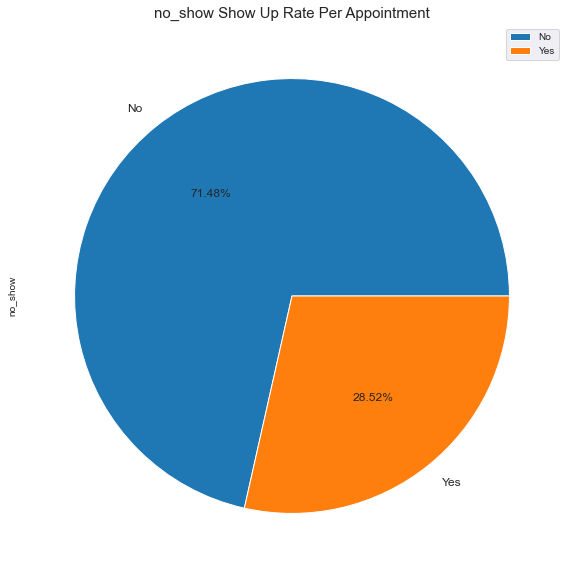

In [629]:
#Calling our function to create a pie chart diagram
showuprate(df, 'no_show');

### Is the age associate with patients attending their appointments?

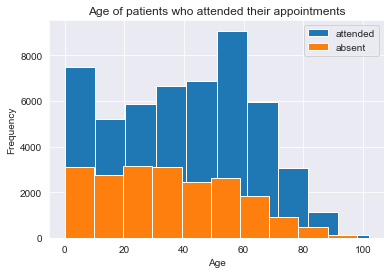

In [630]:
#Creating a mask for no show to differentiate between attend and absent patients for easier visualization
attended = (df.no_show == 'No')
absent = (df.no_show == 'Yes')
df[attended].age.plot.hist()
df[absent].age.plot.hist()
plt.title("Age of patients who attended their appointments")
plt.xlabel('Age')
plt.legend(['attended', 'absent']);
plt.show()

## Did the pateint who didn't recieve sms messages didn't show up for their appointments?

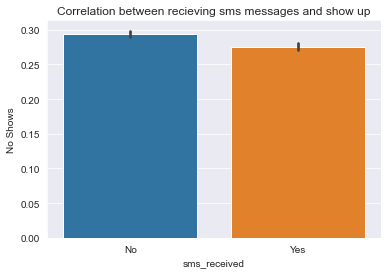

In [631]:
#Creating a dictionary for no show to differentiate between attend and absent patients for easier visualization
attendance = {1:'Yes', 0:'No'}
graph = sns.barplot(x=df.sms_received.map(attendance), y=df.noshow)
graph.set_ylabel('No Shows')
plt.title('Correlation between recieving sms messages and show up')
plt.show()

## Do some days of the week has fewer attendance?

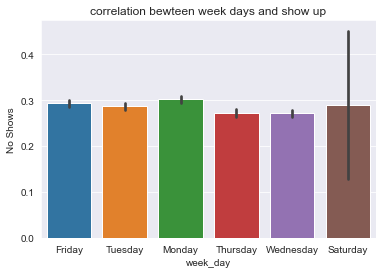

In [632]:
#relation beween days of week and patients attending their appointments
graph2 = sns.barplot(x=df.week_day, y=df.noshow)
graph2.set(ylabel='No Shows')
plt.title('correlation bewteen week days and show up')
plt.show()

## Does handicap, diabtes, hypertension or alcoholic patiends tend to not attend their appointments?

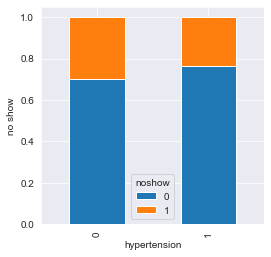

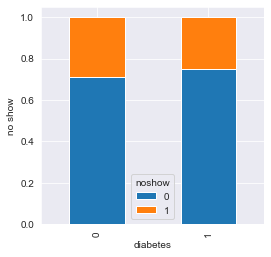

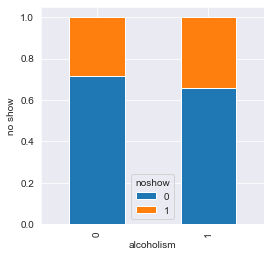

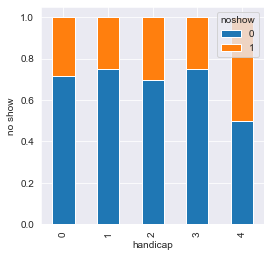

In [633]:
#creating a list for the special cases then making a for loop to dispaly their graphs with respect to no show
list_type = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
for col in list_type:
    col_type =pd.crosstab(df[col],df['noshow'])
    col_type.div(col_type.sum(1).astype(float), axis=0).plot(kind="bar",  stacked=True, figsize=(4,4)); 
    plt.ylabel('no show');

## Which neighbourhood has the highest number of appointments?

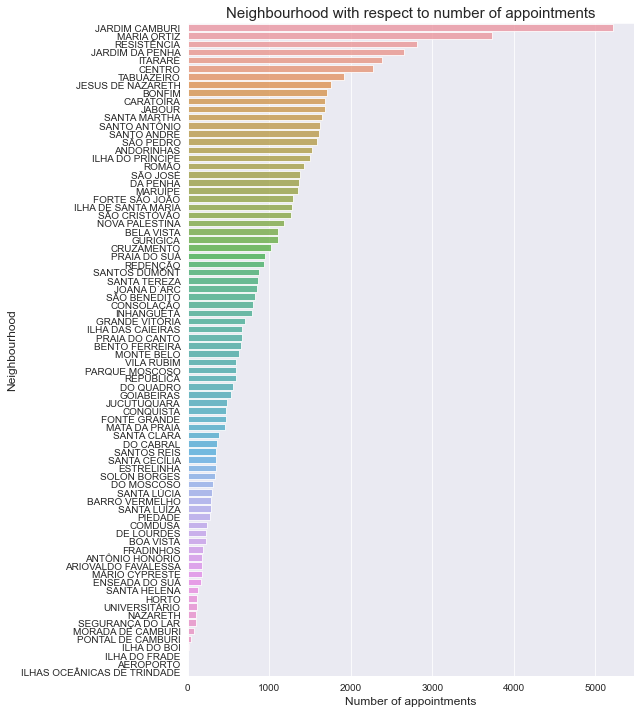

In [634]:
#  Neighbourhood values based on the recurring appointments
app = df['neighbourhood'].value_counts()
plt.figure(figsize=(8,12))
sns.barplot(y=app.index, x=app.values, alpha=0.8)
plt.xlabel('Number of appointments', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood with respect to number of appointments", fontsize=15)
plt.show()

## Limitations

Lack of useful data such as if the patient is employed or not and how it can effect the attendance of the appointments. and most of the analysis is based on number of appointments and not number of patients which can be useful.

<a id='conclusions'></a>
## Conclusions

As we have seen in our analysis that older people do tend to not attend their appointments. Suprisengly though, people who didn't receive any reminders showed up for their appointments but that could be due to lack of data. 

## Refences
1- <a href="https://www.kaggle.com/joniarroba/noshowappointments">kaggle</a>

2- <a href="https://stackoverflow.com/">Stackoverflow</a>

3- <a href="https://github.com/">Github</a>

4- <a href="https://numpy.org/doc/">Numpy</a>

5- <a href="https://pandas.pydata.org/docs/">Pandas</a>